In [82]:
import torch
from torch.autograd import Variable
from torch import optim
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from matplotlib import pyplot as plt
import skimage
%matplotlib inline
plt.style.use('ggplot')
from IPython.core.debugger import set_trace
from tensorboardX import SummaryWriter

## Model

In [44]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return(y_pred)

## Training

In [79]:
def train(model, criterion, optimizer, x, y):
    x = Variable(x, requires_grad=False)
    y = Variable(y, requires_grad=False)
    # format as [[a],[b],[c]]
    x = x.view(len(x), 1)
    y = y.view(len(y), 1)
    # reset gradient
    optimizer.zero_grad()
    # forward
    #set_trace()
    y_ = model.forward(x)
    loss = criterion(y_, y)
    loss.backward()
    optimizer.step()
    return(loss)
    #print('epoch {}, loss {}'.format(epoch, loss.data[0]))

# Data

torch.Size([101]) torch.Size([101])


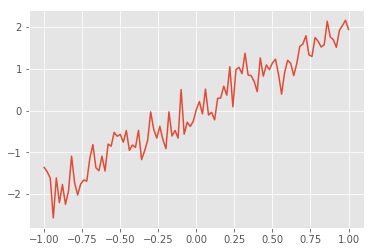

In [94]:
torch.manual_seed(42)
X = torch.linspace(-1, 1, 101)
Y = 2 * X + torch.randn(X.size()) * 0.33
print(X.size(), Y.size())
plt.plot(X.numpy(), Y.numpy())

## Main

In [80]:
lin_reg = LinearRegression(1, 1)
criterion = nn.MSELoss(size_average=True)
optimizer = optim.SGD(lin_reg.parameters(), lr=0.01, momentum=0.9)

In [97]:
writer = SummaryWriter()
for epoch in range(500):
    loss = train(lin_reg, criterion, optimizer, X, Y).item()
    writer.add_scalar('data/loss',loss, epoch)
    print("epoch: %d loss: %f" % (epoch, loss))
writer.export_scalars_to_json("./scalars.json")
writer.close()

epoch: 0 loss: 0.103790
epoch: 1 loss: 0.103790
epoch: 2 loss: 0.103790
epoch: 3 loss: 0.103790
epoch: 4 loss: 0.103790


In [87]:
# tensorboard --logdir runs

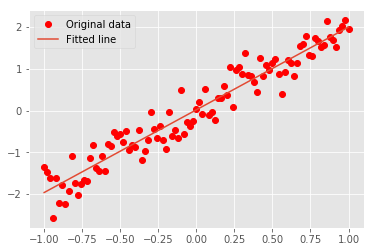

In [98]:
predicted = lin_reg(X.view(len(X), 1))
plt.plot(X.numpy(), Y.numpy(), 'ro', label='Original data')
plt.plot(X.numpy(), predicted.data.numpy(), label='Fitted line')
plt.legend()
plt.show()

In [ ]:
torch.save(lin_reg.stage)